# Poly Regression

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle
import sklearn.model_selection as model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import sklearn.model_selection as model_selection
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [3]:
# flights table
data = pd.read_csv('/Users/Matthew Wong/flights_table_optimized(50,000 points).csv',delimiter=';')
data = data.iloc[: , 1:]

In [4]:
#Assign train and target variables
X = data[['month','day','year','origin_city','origin_city_state','dest_city','dest_city_state','Route','distance','air_time','depart_hour','dep_delay_route','arr_delay_route','taxi_out_route','taxi_in_route','dep_delay_city','arr_delay_city','taxi_out_city','taxi_in_city','dep_delay_month','arr_delay_month','taxi_out_month','taxi_in_month']]
y = data['arr_delay']

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,train_size=0.75,test_size=0.25,random_state=123)

In [5]:
display(data.head(3))
display(data.shape)

,month,day,year,origin_city,origin_city_state,dest_city,dest_city_state,Route,distance,air_time,...,taxi_in_route,dep_delay_city,arr_delay_city,taxi_out_city,taxi_in_city,dep_delay_month,arr_delay_month,taxi_out_month,taxi_in_month,arr_delay
0,12,30,2019,220,17,105,8,2987,674.0,84.0,...,8.444444,1.710611,-4.176849,11.800643,8.057878,0.892546,-5.488575,17.429543,7.718988,-3.0
1,4,8,2018,296,49,233,4,4370,672.0,98.0,...,6.208333,1.014692,-4.634527,19.509642,6.965106,-0.045202,-5.727201,16.802538,7.431139,25.0
2,11,21,2018,52,40,17,9,604,259.0,46.0,...,10.238095,-1.163522,-7.421384,14.861635,8.779874,0.093850,-5.732620,16.940107,7.404545,-13.0


(44551, 24)

In [6]:
#Create a Gaussian Classifier
model = make_pipeline(PolynomialFeatures(2),LinearRegression())

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)

#save the model
filename = 'Poly_regression.sav'
pickle.dump(model,open(filename, 'wb'))

y_pred = model.predict(X_test)

R2 Score for train data: 0.226
R2 Score2 for test data: 0.222
MAE Score for test data:  10.49


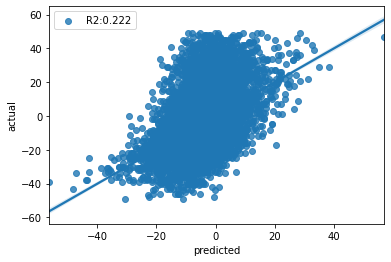

In [7]:
#prints the R2 score for your test dataset
print('R2 Score for train data:', round(model.score(X_train,y_train),3))
print('R2 Score2 for test data:', round(r2_score(y_test,y_pred),3))
print('MAE Score for test data: ', round(mean_absolute_error(y_test,y_pred),2))

df = pd.DataFrame(
        {
            'actual':y_test,
            'predicted':y_pred
        }
)
df

sns.regplot(x='predicted',y='actual',data=df,label='R2:'+ str(round(r2_score(y_test,y_pred),3)))
plt.legend(loc=0)
plt.show()

# Poly Regression Grid Search

In [8]:
#Create a Gaussian Classifier

x = [1,2,3]
scores = []

for x in x:
    model = make_pipeline(PolynomialFeatures(x),LinearRegression())
    #Train the model using the training sets y_pred=clf.predict(X_test)
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    
    scores.append(round(r2_score(y_test,y_pred),3))

In [9]:
print('R2 Scores by parameter:')
print('Feature 1 = ', scores[0])
print('Feature 2 = ', scores[1])
print('Feature 3 = ', scores[2])

R2 Scores by parameter:
Feature 1 =  0.196
Feature 2 =  0.222
Feature 3 =  0.171
